In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import argparse
from torchvision import transforms


# Q2

In [25]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(32*32*3,10)    

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        return x


net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
correct = 0
total = 0
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

epoch_list = []
Test_list = []
CA_list = []
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            epoch_list.append((running_loss / 2000, epoch + 1))
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
        
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = net(images)
         # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            Test_list.append((100 * correct // total, epoch + 1))

        print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predictions = torch.max(outputs, 1)
            # collect the correct predictions for each class
            for label, prediction in zip(labels, predictions):
                if label == prediction:
                    correct_pred[classes[label]] += 1
                total_pred[classes[label]] += 1


# print accuracy for each class
    for classname, correct_count in correct_pred.items():
        CA_list.append((100 * float(correct_count) / total_pred[classname],epoch + 1))
        accuracy = 100 * float(correct_count) / total_pred[classname]
        print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')
    
print('Finished Training')


Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 2.114
[1,  4000] loss: 2.053
[1,  6000] loss: 2.038
[1,  8000] loss: 2.024
[1, 10000] loss: 2.025
[1, 12000] loss: 2.046
Accuracy of the network on the 10000 test images: 34 %
Accuracy for class: plane is 35.0 %
Accuracy for class: car   is 37.3 %
Accuracy for class: bird  is 30.5 %
Accuracy for class: cat   is 24.0 %
Accuracy for class: deer  is 33.8 %
Accuracy for class: dog   is 15.3 %
Accuracy for class: frog  is 52.2 %
Accuracy for class: horse is 24.1 %
Accuracy for class: ship  is 28.1 %
Accuracy for class: truck is 59.9 %
[2,  2000] loss: 1.961
[2,  4000] loss: 1.979
[2,  6000] loss: 1.959
[2,  8000] loss: 1.987
[2, 10000] loss: 1.960
[2, 12000] loss: 1.978
Accuracy of the network on the 10000 test images: 35 %
Accuracy for class: plane is 42.0 %
Accuracy for class: car   is 46.8 %
Accuracy for class: bird  is 24.6 %
Accuracy for class: cat   is 17.2 %
Accuracy for class: deer  is 29.1 

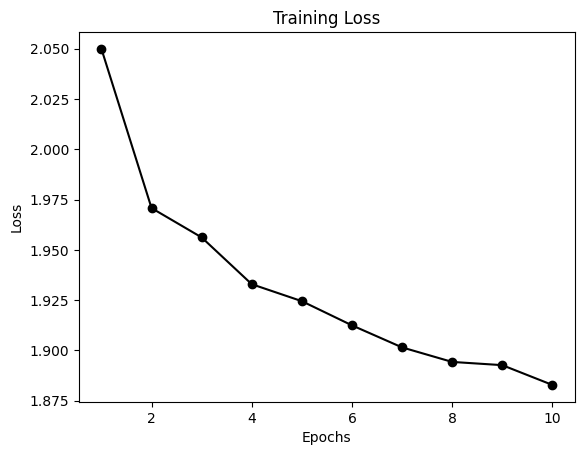

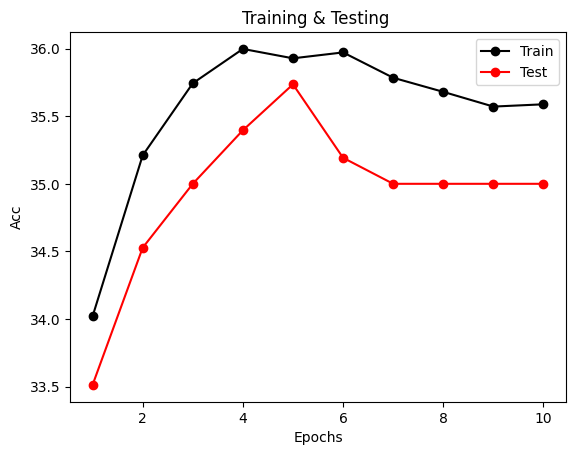

In [28]:
loss_y = {}
for y,x in epoch_list:
    if x not in loss_y:
        loss_y[x]=[y]
    else:
        loss_y[x].append(y)
for x in loss_y:
    loss_y[x]=np.mean(loss_y[x])
loss_y.keys(), loss_y.values()

plt.plot(loss_y.keys(),loss_y.values(), '-o', color = 'black')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


loss_y_train = {}
for y,x in CA_list:
    if x not in loss_y_train:
        loss_y_train[x]=[y]
    else:
        loss_y_train[x].append(y)
for x in loss_y_train:
    loss_y_train[x]=np.mean(loss_y_train[x])


loss_y_test = {}
for y,x in Test_list:
    if x not in loss_y_test:
        loss_y_test[x]=[y]
    else:
        loss_y_test[x].append(y)
for x in loss_y_test:
    loss_y_test[x]=np.mean(loss_y_test[x])


plt.plot(loss_y_train.keys(), loss_y_train.values(), '-o', color = 'black', label = 'Train')
plt.plot(loss_y_test.keys(), loss_y_test.values(), '-o', color = 'red', label = 'Test')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.title('Training & Testing ')
plt.legend()
plt.show()


# Q3

In [30]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(32*32*3, 140)
        self.fc2 = nn.Linear(140, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = x.view(-1, 32*32*3)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))  
        x = self.fc3(x)          
        return x

net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

TestQ2_list = []
epochQ2_list = []
CAQ2_list = []
correct = 0
total = 0
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

for epoch in range(25):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            epochQ2_list.append((running_loss / 2000, epoch + 1))
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

    # Testing after each epoch

    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            TestQ2_list.append((100 * correct // total, epoch + 1))

    print(f'Epoch {epoch+1} - Accuracy of the network on the 10000 test images: {100 * correct // total} %')

    # prepare to count predictions for each class


    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predictions = torch.max(outputs, 1)
            # collect the correct predictions for each class
            for label, prediction in zip(labels, predictions):
                if label == prediction:
                    correct_pred[classes[label]] += 1
                total_pred[classes[label]] += 1

    # print accuracy for each class
    for classname, correct_count in correct_pred.items():
        CAQ2_list.append((100 * float(correct_count) / total_pred[classname], epoch + 1))
        accuracy = 100 * float(correct_count) / total_pred[classname]
        print(f'Epoch {epoch+1} - Accuracy for class: {classname:5s} is {accuracy:.1f} %')

print('Finished Training')


Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 1.946
[1,  4000] loss: 1.720
[1,  6000] loss: 1.673
[1,  8000] loss: 1.621
[1, 10000] loss: 1.573
[1, 12000] loss: 1.553
Epoch 1 - Accuracy of the network on the 10000 test images: 45 %
Epoch 1 - Accuracy for class: plane is 46.6 %
Epoch 1 - Accuracy for class: car   is 65.6 %
Epoch 1 - Accuracy for class: bird  is 36.0 %
Epoch 1 - Accuracy for class: cat   is 24.8 %
Epoch 1 - Accuracy for class: deer  is 24.5 %
Epoch 1 - Accuracy for class: dog   is 29.6 %
Epoch 1 - Accuracy for class: frog  is 70.7 %
Epoch 1 - Accuracy for class: horse is 51.8 %
Epoch 1 - Accuracy for class: ship  is 69.0 %
Epoch 1 - Accuracy for class: truck is 41.1 %
[2,  2000] loss: 1.467
[2,  4000] loss: 1.504
[2,  6000] loss: 1.467
[2,  8000] loss: 1.462
[2, 10000] loss: 1.451
[2, 12000] loss: 1.430
Epoch 2 - Accuracy of the network on the 10000 test images: 47 %
Epoch 2 - Accuracy for class: plane is 49.6 %
Epoch 2 - Ac

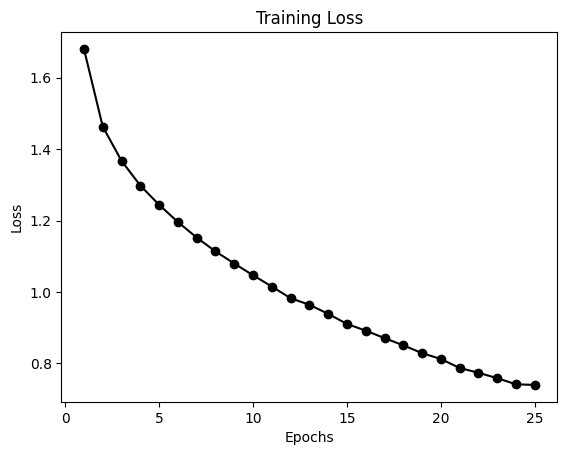

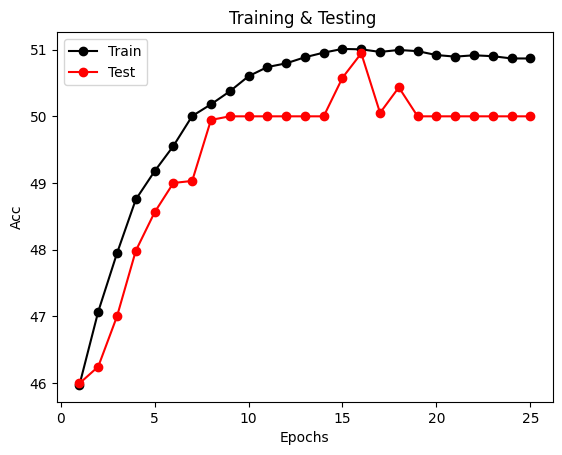

In [31]:
loss_y = {}
for y,x in epochQ2_list:
    if x not in loss_y:
        loss_y[x]=[y]
    else:
        loss_y[x].append(y)
for x in loss_y:
    loss_y[x]=np.mean(loss_y[x])
loss_y.keys(), loss_y.values()

plt.plot(loss_y.keys(),loss_y.values(), '-o', color = 'black')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


loss_y_train = {}
for y,x in CAQ2_list:
    if x not in loss_y_train:
        loss_y_train[x]=[y]
    else:
        loss_y_train[x].append(y)
for x in loss_y_train:
    loss_y_train[x]=np.mean(loss_y_train[x])


loss_y_test = {}
for y,x in TestQ2_list:
    if x not in loss_y_test:
        loss_y_test[x]=[y]
    else:
        loss_y_test[x].append(y)
for x in loss_y_test:
    loss_y_test[x]=np.mean(loss_y_test[x])


plt.plot(loss_y_train.keys(), loss_y_train.values(), '-o', color = 'black', label = 'Train')
plt.plot(loss_y_test.keys(), loss_y_test.values(), '-o', color = 'red', label = 'Test')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.title('Training & Testing ')
plt.legend()
plt.show()


If don't use ReLU then the neural network would remain a linear model, regardless of its depth. This is because the composition of multiple linear transformations is still a linear transformation. This linearity greatly limits the learning ability of the network. Without ReLU or a similar non-linear activation function, the model would not be able to learn from its mistakes and adjust model parameters appropriately during training. This will lead to poor performance on tasks with complex underlying patterns, especially tasks such as image classification , where the model needs to recognize complex non-linear relationships between pixel values ​​to accurately classify an image. In conclusion, ReLU  are crucial in neural networks, allowing them to model and learn complex non-linear relationships in data. Without it, deep networks collapse into linear models, losing most of their expressive power and learning ability.

# Q4

In [32]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 140)
        self.fc2 = nn.Linear(140, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

TestQ2_list = []
epochQ2_list = []
CAQ2_list = []
correct = 0
total = 0
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

for epoch in range(25):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            epochQ2_list.append((running_loss / 2000, epoch + 1))
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

    # Testing after each epoch

    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            TestQ2_list.append((100 * correct // total, epoch + 1))

    print(f'Epoch {epoch+1} - Accuracy of the network on the 10000 test images: {100 * correct // total} %')

    # prepare to count predictions for each class


    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predictions = torch.max(outputs, 1)
            # collect the correct predictions for each class
            for label, prediction in zip(labels, predictions):
                if label == prediction:
                    correct_pred[classes[label]] += 1
                total_pred[classes[label]] += 1

    # print accuracy for each class
    for classname, correct_count in correct_pred.items():
        CAQ2_list.append((100 * float(correct_count) / total_pred[classname], epoch + 1))
        accuracy = 100 * float(correct_count) / total_pred[classname]
        print(f'Epoch {epoch+1} - Accuracy for class: {classname:5s} is {accuracy:.1f} %')

print('Finished Training')


Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 2.189
[1,  4000] loss: 1.864
[1,  6000] loss: 1.694
[1,  8000] loss: 1.601
[1, 10000] loss: 1.545
[1, 12000] loss: 1.484
Epoch 1 - Accuracy of the network on the 10000 test images: 49 %
Epoch 1 - Accuracy for class: plane is 49.0 %
Epoch 1 - Accuracy for class: car   is 62.3 %
Epoch 1 - Accuracy for class: bird  is 39.3 %
Epoch 1 - Accuracy for class: cat   is 27.0 %
Epoch 1 - Accuracy for class: deer  is 29.7 %
Epoch 1 - Accuracy for class: dog   is 50.8 %
Epoch 1 - Accuracy for class: frog  is 54.6 %
Epoch 1 - Accuracy for class: horse is 52.0 %
Epoch 1 - Accuracy for class: ship  is 71.1 %
Epoch 1 - Accuracy for class: truck is 59.8 %
[2,  2000] loss: 1.435
[2,  4000] loss: 1.383
[2,  6000] loss: 1.363
[2,  8000] loss: 1.327
[2, 10000] loss: 1.286
[2, 12000] loss: 1.301
Epoch 2 - Accuracy of the network on the 10000 test images: 51 %
Epoch 2 - Accuracy for class: plane is 64.0 %
Epoch 2 - Ac

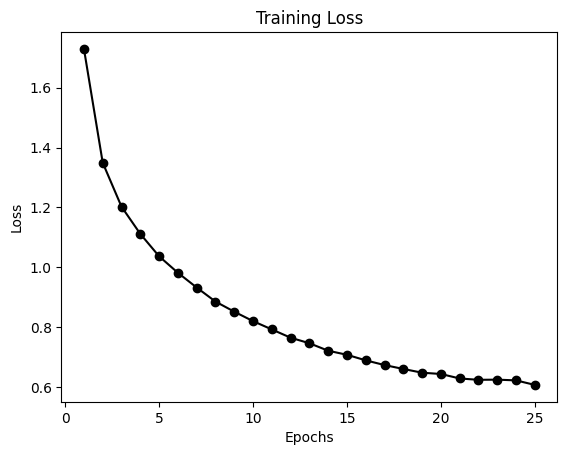

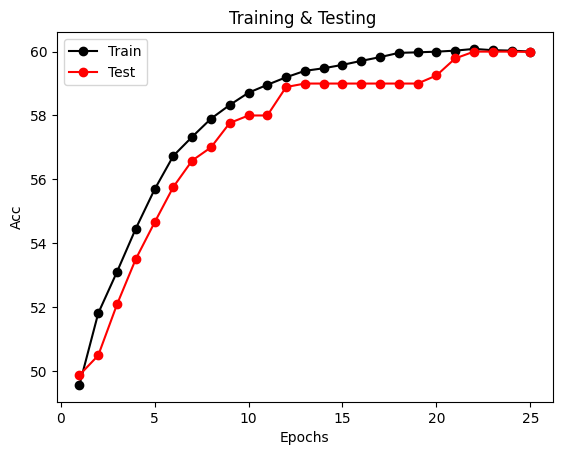

In [33]:
loss_y = {}
for y,x in epochQ2_list:
    if x not in loss_y:
        loss_y[x]=[y]
    else:
        loss_y[x].append(y)
for x in loss_y:
    loss_y[x]=np.mean(loss_y[x])
loss_y.keys(), loss_y.values()

plt.plot(loss_y.keys(),loss_y.values(), '-o', color = 'black')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


loss_y_train = {}
for y,x in CAQ2_list:
    if x not in loss_y_train:
        loss_y_train[x]=[y]
    else:
        loss_y_train[x].append(y)
for x in loss_y_train:
    loss_y_train[x]=np.mean(loss_y_train[x])


loss_y_test = {}
for y,x in TestQ2_list:
    if x not in loss_y_test:
        loss_y_test[x]=[y]
    else:
        loss_y_test[x].append(y)
for x in loss_y_test:
    loss_y_test[x]=np.mean(loss_y_test[x])


plt.plot(loss_y_train.keys(), loss_y_train.values(), '-o', color = 'black', label = 'Train')
plt.plot(loss_y_test.keys(), loss_y_test.values(), '-o', color = 'red', label = 'Test')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.title('Training & Testing ')
plt.legend()
plt.show()


# Q5

## Batch size 1

In [34]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 1

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 140)
        self.fc2 = nn.Linear(140, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

TestQ2_list = []
epochQ2_list = []
CAQ2_list = []
correct = 0
total = 0
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

for epoch in range(25):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            epochQ2_list.append((running_loss / 2000, epoch + 1))
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

    # Testing after each epoch

    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            TestQ2_list.append((100 * correct // total, epoch + 1))

    print(f'Epoch {epoch+1} - Accuracy of the network on the 10000 test images: {100 * correct // total} %')

    # prepare to count predictions for each class


    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predictions = torch.max(outputs, 1)
            # collect the correct predictions for each class
            for label, prediction in zip(labels, predictions):
                if label == prediction:
                    correct_pred[classes[label]] += 1
                total_pred[classes[label]] += 1

    # print accuracy for each class
    for classname, correct_count in correct_pred.items():
        CAQ2_list.append((100 * float(correct_count) / total_pred[classname], epoch + 1))
        accuracy = 100 * float(correct_count) / total_pred[classname]
        print(f'Epoch {epoch+1} - Accuracy for class: {classname:5s} is {accuracy:.1f} %')

print('Finished Training')


Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 2.257
[1,  4000] loss: 2.066
[1,  6000] loss: 1.956
[1,  8000] loss: 1.828
[1, 10000] loss: 1.770
[1, 12000] loss: 1.725
[1, 14000] loss: 1.674
[1, 16000] loss: 1.678
[1, 18000] loss: 1.639
[1, 20000] loss: 1.615
[1, 22000] loss: 1.579
[1, 24000] loss: 1.601
[1, 26000] loss: 1.587
[1, 28000] loss: 1.587
[1, 30000] loss: 1.593
[1, 32000] loss: 1.607
[1, 34000] loss: 1.522
[1, 36000] loss: 1.554
[1, 38000] loss: 1.533
[1, 40000] loss: 1.539
[1, 42000] loss: 1.567
[1, 44000] loss: 1.529
[1, 46000] loss: 1.567
[1, 48000] loss: 1.481
[1, 50000] loss: 1.510
Epoch 1 - Accuracy of the network on the 10000 test images: 44 %
Epoch 1 - Accuracy for class: plane is 53.4 %
Epoch 1 - Accuracy for class: car   is 34.5 %
Epoch 1 - Accuracy for class: bird  is 34.2 %
Epoch 1 - Accuracy for class: cat   is 34.5 %
Epoch 1 - Accuracy for class: deer  is 52.2 %
Epoch 1 - Accuracy for class: dog   is 48.2 %
Epoch 1 

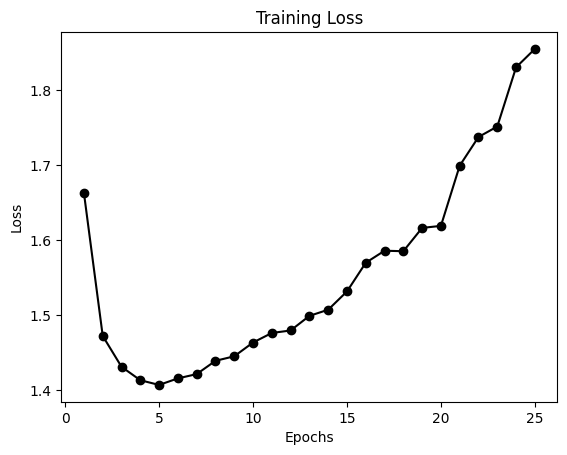

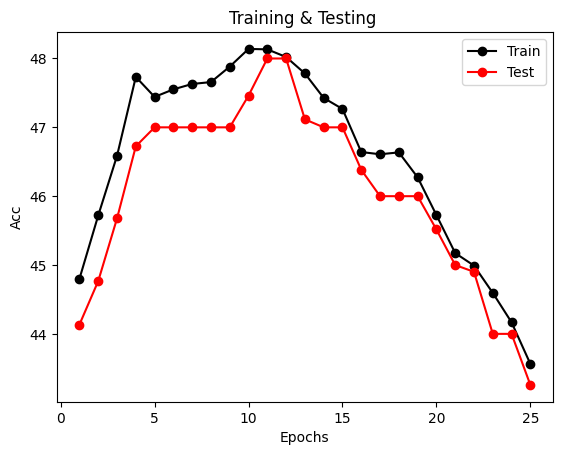

In [35]:
loss_y = {}
for y,x in epochQ2_list:
    if x not in loss_y:
        loss_y[x]=[y]
    else:
        loss_y[x].append(y)
for x in loss_y:
    loss_y[x]=np.mean(loss_y[x])
loss_y.keys(), loss_y.values()

plt.plot(loss_y.keys(),loss_y.values(), '-o', color = 'black')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


loss_y_train = {}
for y,x in CAQ2_list:
    if x not in loss_y_train:
        loss_y_train[x]=[y]
    else:
        loss_y_train[x].append(y)
for x in loss_y_train:
    loss_y_train[x]=np.mean(loss_y_train[x])


loss_y_test = {}
for y,x in TestQ2_list:
    if x not in loss_y_test:
        loss_y_test[x]=[y]
    else:
        loss_y_test[x].append(y)
for x in loss_y_test:
    loss_y_test[x]=np.mean(loss_y_test[x])


plt.plot(loss_y_train.keys(), loss_y_train.values(), '-o', color = 'black', label = 'Train')
plt.plot(loss_y_test.keys(), loss_y_test.values(), '-o', color = 'red', label = 'Test')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.title('Training & Testing ')
plt.legend()
plt.show()


## Batch Size 4

In [36]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 140)
        self.fc2 = nn.Linear(140, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

TestQ2_list = []
epochQ2_list = []
CAQ2_list = []
correct = 0
total = 0
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

for epoch in range(25):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            epochQ2_list.append((running_loss / 2000, epoch + 1))
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

    # Testing after each epoch

    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            TestQ2_list.append((100 * correct // total, epoch + 1))

    print(f'Epoch {epoch+1} - Accuracy of the network on the 10000 test images: {100 * correct // total} %')

    # prepare to count predictions for each class


    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predictions = torch.max(outputs, 1)
            # collect the correct predictions for each class
            for label, prediction in zip(labels, predictions):
                if label == prediction:
                    correct_pred[classes[label]] += 1
                total_pred[classes[label]] += 1

    # print accuracy for each class
    for classname, correct_count in correct_pred.items():
        CAQ2_list.append((100 * float(correct_count) / total_pred[classname], epoch + 1))
        accuracy = 100 * float(correct_count) / total_pred[classname]
        print(f'Epoch {epoch+1} - Accuracy for class: {classname:5s} is {accuracy:.1f} %')

print('Finished Training')


Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 2.160
[1,  4000] loss: 1.806
[1,  6000] loss: 1.632
[1,  8000] loss: 1.544
[1, 10000] loss: 1.484
[1, 12000] loss: 1.442
Epoch 1 - Accuracy of the network on the 10000 test images: 50 %
Epoch 1 - Accuracy for class: plane is 51.7 %
Epoch 1 - Accuracy for class: car   is 57.2 %
Epoch 1 - Accuracy for class: bird  is 23.9 %
Epoch 1 - Accuracy for class: cat   is 26.7 %
Epoch 1 - Accuracy for class: deer  is 39.9 %
Epoch 1 - Accuracy for class: dog   is 33.0 %
Epoch 1 - Accuracy for class: frog  is 70.9 %
Epoch 1 - Accuracy for class: horse is 58.6 %
Epoch 1 - Accuracy for class: ship  is 64.3 %
Epoch 1 - Accuracy for class: truck is 74.5 %
[2,  2000] loss: 1.372
[2,  4000] loss: 1.339
[2,  6000] loss: 1.323
[2,  8000] loss: 1.302
[2, 10000] loss: 1.273
[2, 12000] loss: 1.247
Epoch 2 - Accuracy of the network on the 10000 test images: 53 %
Epoch 2 - Accuracy for class: plane is 53.9 %
Epoch 2 - Ac

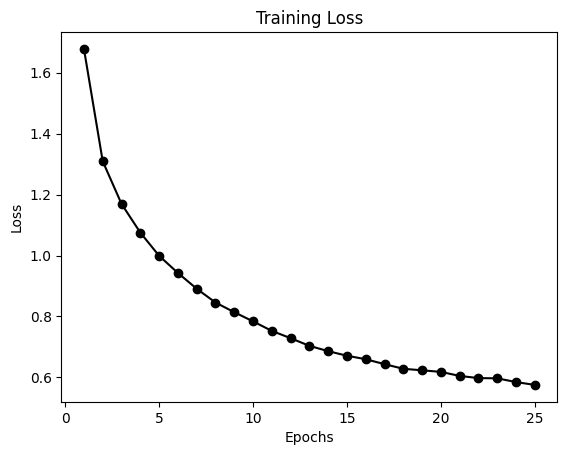

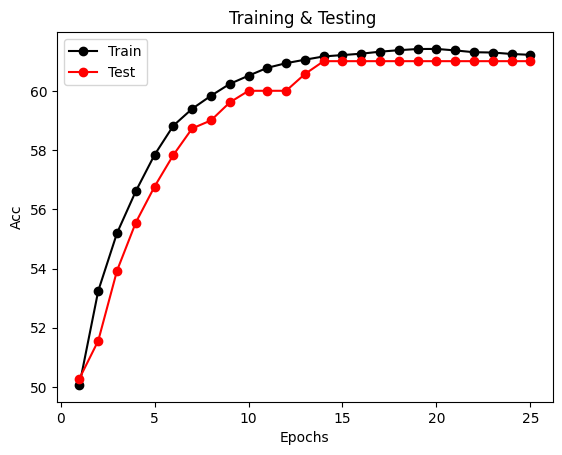

In [37]:
loss_y = {}
for y,x in epochQ2_list:
    if x not in loss_y:
        loss_y[x]=[y]
    else:
        loss_y[x].append(y)
for x in loss_y:
    loss_y[x]=np.mean(loss_y[x])
loss_y.keys(), loss_y.values()

plt.plot(loss_y.keys(),loss_y.values(), '-o', color = 'black')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


loss_y_train = {}
for y,x in CAQ2_list:
    if x not in loss_y_train:
        loss_y_train[x]=[y]
    else:
        loss_y_train[x].append(y)
for x in loss_y_train:
    loss_y_train[x]=np.mean(loss_y_train[x])


loss_y_test = {}
for y,x in TestQ2_list:
    if x not in loss_y_test:
        loss_y_test[x]=[y]
    else:
        loss_y_test[x].append(y)
for x in loss_y_test:
    loss_y_test[x]=np.mean(loss_y_test[x])


plt.plot(loss_y_train.keys(), loss_y_train.values(), '-o', color = 'black', label = 'Train')
plt.plot(loss_y_test.keys(), loss_y_test.values(), '-o', color = 'red', label = 'Test')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.title('Training & Testing ')
plt.legend()
plt.show()


## Batch Size 1000

In [38]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 1000

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 140)
        self.fc2 = nn.Linear(140, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

TestQ2_list = []
epochQ2_list = []
CAQ2_list = []
correct = 0
total = 0
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

for epoch in range(25):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            epochQ2_list.append((running_loss / 2000, epoch + 1))
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

    # Testing after each epoch

    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            TestQ2_list.append((100 * correct // total, epoch + 1))

    print(f'Epoch {epoch+1} - Accuracy of the network on the 10000 test images: {100 * correct // total} %')

    # prepare to count predictions for each class


    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predictions = torch.max(outputs, 1)
            # collect the correct predictions for each class
            for label, prediction in zip(labels, predictions):
                if label == prediction:
                    correct_pred[classes[label]] += 1
                total_pred[classes[label]] += 1

    # print accuracy for each class
    for classname, correct_count in correct_pred.items():
        CAQ2_list.append((100 * float(correct_count) / total_pred[classname], epoch + 1))
        accuracy = 100 * float(correct_count) / total_pred[classname]
        print(f'Epoch {epoch+1} - Accuracy for class: {classname:5s} is {accuracy:.1f} %')

print('Finished Training')


Files already downloaded and verified
Files already downloaded and verified
Epoch 1 - Accuracy of the network on the 10000 test images: 10 %
Epoch 1 - Accuracy for class: plane is 0.0 %
Epoch 1 - Accuracy for class: car   is 0.0 %
Epoch 1 - Accuracy for class: bird  is 0.0 %
Epoch 1 - Accuracy for class: cat   is 0.0 %
Epoch 1 - Accuracy for class: deer  is 0.0 %
Epoch 1 - Accuracy for class: dog   is 100.0 %
Epoch 1 - Accuracy for class: frog  is 0.0 %
Epoch 1 - Accuracy for class: horse is 0.0 %
Epoch 1 - Accuracy for class: ship  is 0.0 %
Epoch 1 - Accuracy for class: truck is 0.0 %
Epoch 2 - Accuracy of the network on the 10000 test images: 10 %
Epoch 2 - Accuracy for class: plane is 0.0 %
Epoch 2 - Accuracy for class: car   is 0.0 %
Epoch 2 - Accuracy for class: bird  is 0.0 %
Epoch 2 - Accuracy for class: cat   is 0.0 %
Epoch 2 - Accuracy for class: deer  is 0.0 %
Epoch 2 - Accuracy for class: dog   is 100.0 %
Epoch 2 - Accuracy for class: frog  is 0.0 %
Epoch 2 - Accuracy for cl

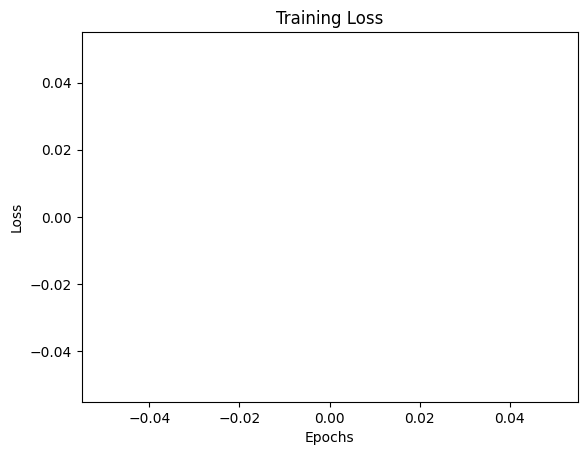

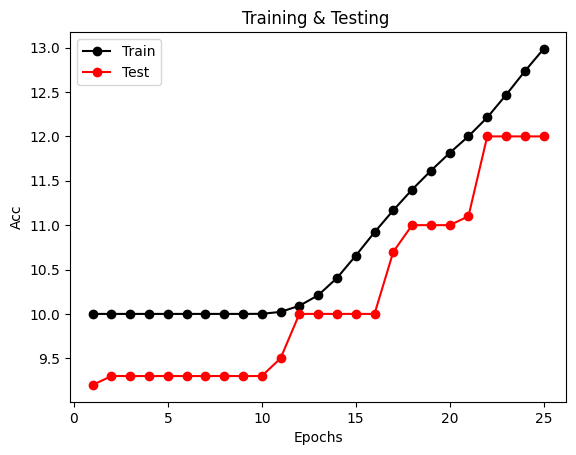

In [39]:
loss_y = {}
for y,x in epochQ2_list:
    if x not in loss_y:
        loss_y[x]=[y]
    else:
        loss_y[x].append(y)
for x in loss_y:
    loss_y[x]=np.mean(loss_y[x])
loss_y.keys(), loss_y.values()

plt.plot(loss_y.keys(),loss_y.values(), '-o', color = 'black')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


loss_y_train = {}
for y,x in CAQ2_list:
    if x not in loss_y_train:
        loss_y_train[x]=[y]
    else:
        loss_y_train[x].append(y)
for x in loss_y_train:
    loss_y_train[x]=np.mean(loss_y_train[x])


loss_y_test = {}
for y,x in TestQ2_list:
    if x not in loss_y_test:
        loss_y_test[x]=[y]
    else:
        loss_y_test[x].append(y)
for x in loss_y_test:
    loss_y_test[x]=np.mean(loss_y_test[x])


plt.plot(loss_y_train.keys(), loss_y_train.values(), '-o', color = 'black', label = 'Train')
plt.plot(loss_y_test.keys(), loss_y_test.values(), '-o', color = 'red', label = 'Test')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.title('Training & Testing ')
plt.legend()
plt.show()


# Q6

## lr = 10

In [40]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 140)
        self.fc2 = nn.Linear(140, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=10, momentum=0.9)

TestQ2_list = []
epochQ2_list = []
CAQ2_list = []
correct = 0
total = 0
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

for epoch in range(25):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            epochQ2_list.append((running_loss / 2000, epoch + 1))
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

    # Testing after each epoch

    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            TestQ2_list.append((100 * correct // total, epoch + 1))

    print(f'Epoch {epoch+1} - Accuracy of the network on the 10000 test images: {100 * correct // total} %')

    # prepare to count predictions for each class


    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predictions = torch.max(outputs, 1)
            # collect the correct predictions for each class
            for label, prediction in zip(labels, predictions):
                if label == prediction:
                    correct_pred[classes[label]] += 1
                total_pred[classes[label]] += 1

    # print accuracy for each class
    for classname, correct_count in correct_pred.items():
        CAQ2_list.append((100 * float(correct_count) / total_pred[classname], epoch + 1))
        accuracy = 100 * float(correct_count) / total_pred[classname]
        print(f'Epoch {epoch+1} - Accuracy for class: {classname:5s} is {accuracy:.1f} %')

print('Finished Training')


Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 48465380.373
[1,  4000] loss: 17.853
[1,  6000] loss: 17.344
[1,  8000] loss: 19.189
[1, 10000] loss: 17.826
[1, 12000] loss: 18.687
Epoch 1 - Accuracy of the network on the 10000 test images: 10 %
Epoch 1 - Accuracy for class: plane is 0.0 %
Epoch 1 - Accuracy for class: car   is 0.0 %
Epoch 1 - Accuracy for class: bird  is 0.0 %
Epoch 1 - Accuracy for class: cat   is 0.0 %
Epoch 1 - Accuracy for class: deer  is 0.0 %
Epoch 1 - Accuracy for class: dog   is 0.0 %
Epoch 1 - Accuracy for class: frog  is 0.0 %
Epoch 1 - Accuracy for class: horse is 100.0 %
Epoch 1 - Accuracy for class: ship  is 0.0 %
Epoch 1 - Accuracy for class: truck is 0.0 %
[2,  2000] loss: 18.577
[2,  4000] loss: 18.206
[2,  6000] loss: 19.176
[2,  8000] loss: 18.969
[2, 10000] loss: 18.807
[2, 12000] loss: 17.525
Epoch 2 - Accuracy of the network on the 10000 test images: 10 %
Epoch 2 - Accuracy for class: plane is 0.0 %
Epo

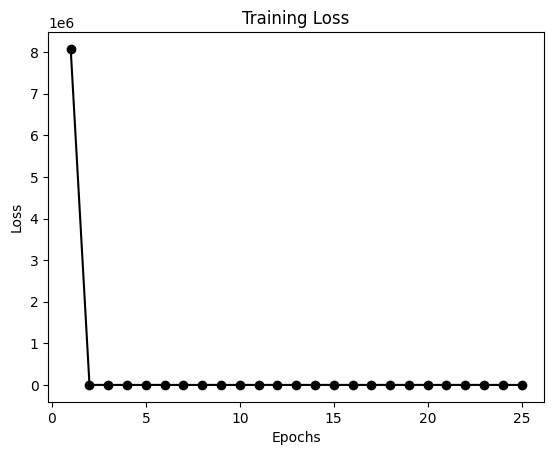

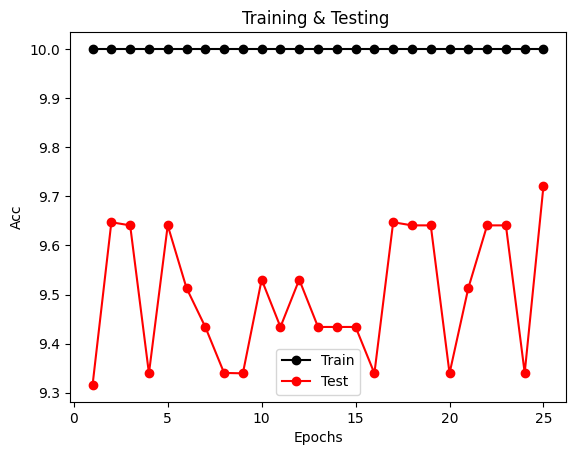

In [41]:
loss_y = {}
for y,x in epochQ2_list:
    if x not in loss_y:
        loss_y[x]=[y]
    else:
        loss_y[x].append(y)
for x in loss_y:
    loss_y[x]=np.mean(loss_y[x])
loss_y.keys(), loss_y.values()

plt.plot(loss_y.keys(),loss_y.values(), '-o', color = 'black')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


loss_y_train = {}
for y,x in CAQ2_list:
    if x not in loss_y_train:
        loss_y_train[x]=[y]
    else:
        loss_y_train[x].append(y)
for x in loss_y_train:
    loss_y_train[x]=np.mean(loss_y_train[x])


loss_y_test = {}
for y,x in TestQ2_list:
    if x not in loss_y_test:
        loss_y_test[x]=[y]
    else:
        loss_y_test[x].append(y)
for x in loss_y_test:
    loss_y_test[x]=np.mean(loss_y_test[x])


plt.plot(loss_y_train.keys(), loss_y_train.values(), '-o', color = 'black', label = 'Train')
plt.plot(loss_y_test.keys(), loss_y_test.values(), '-o', color = 'red', label = 'Test')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.title('Training & Testing ')
plt.legend()
plt.show()


## lr = 0.1

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 140)
        self.fc2 = nn.Linear(140, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9)

TestQ2_list = []
epochQ2_list = []
CAQ2_list = []
correct = 0
total = 0
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

for epoch in range(25):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            epochQ2_list.append((running_loss / 2000, epoch + 1))
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

    # Testing after each epoch

    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            TestQ2_list.append((100 * correct // total, epoch + 1))

    print(f'Epoch {epoch+1} - Accuracy of the network on the 10000 test images: {100 * correct // total} %')

    # prepare to count predictions for each class


    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predictions = torch.max(outputs, 1)
            # collect the correct predictions for each class
            for label, prediction in zip(labels, predictions):
                if label == prediction:
                    correct_pred[classes[label]] += 1
                total_pred[classes[label]] += 1

    # print accuracy for each class
    for classname, correct_count in correct_pred.items():
        CAQ2_list.append((100 * float(correct_count) / total_pred[classname], epoch + 1))
        accuracy = 100 * float(correct_count) / total_pred[classname]
        print(f'Epoch {epoch+1} - Accuracy for class: {classname:5s} is {accuracy:.1f} %')

print('Finished Training')


Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 2.354
[1,  4000] loss: 2.362
[1,  6000] loss: 2.365
[1,  8000] loss: 2.358
[1, 10000] loss: 2.364
[1, 12000] loss: 2.361
Epoch 1 - Accuracy of the network on the 10000 test images: 10 %
Epoch 1 - Accuracy for class: plane is 0.0 %
Epoch 1 - Accuracy for class: car   is 100.0 %
Epoch 1 - Accuracy for class: bird  is 0.0 %
Epoch 1 - Accuracy for class: cat   is 0.0 %
Epoch 1 - Accuracy for class: deer  is 0.0 %
Epoch 1 - Accuracy for class: dog   is 0.0 %
Epoch 1 - Accuracy for class: frog  is 0.0 %
Epoch 1 - Accuracy for class: horse is 0.0 %
Epoch 1 - Accuracy for class: ship  is 0.0 %
Epoch 1 - Accuracy for class: truck is 0.0 %
[2,  2000] loss: 2.361
[2,  4000] loss: 2.359
[2,  6000] loss: 2.358
[2,  8000] loss: 2.362
[2, 10000] loss: 2.355
[2, 12000] loss: 2.359
Epoch 2 - Accuracy of the network on the 10000 test images: 10 %
Epoch 2 - Accuracy for class: plane is 0.0 %
Epoch 2 - Accuracy fo

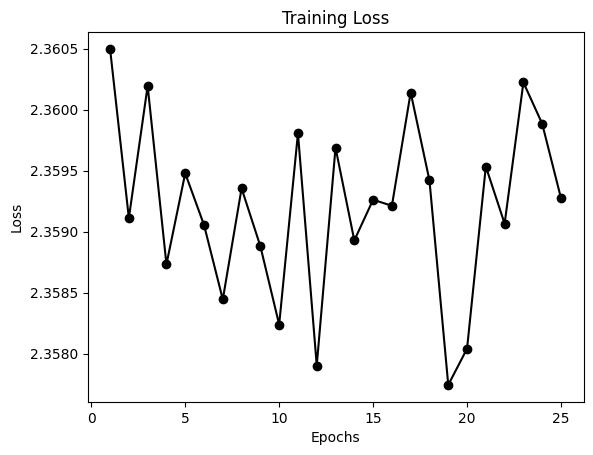

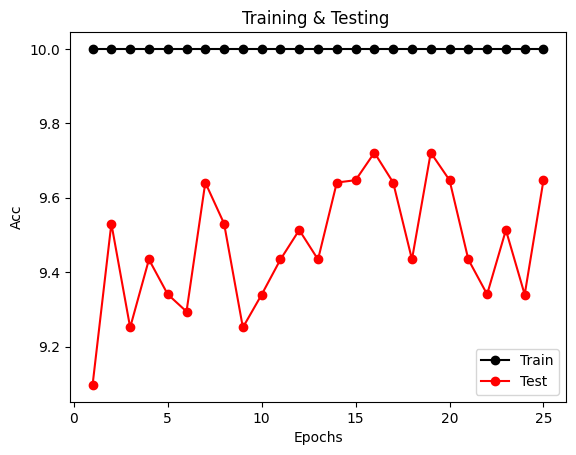

In [4]:
loss_y = {}
for y,x in epochQ2_list:
    if x not in loss_y:
        loss_y[x]=[y]
    else:
        loss_y[x].append(y)
for x in loss_y:
    loss_y[x]=np.mean(loss_y[x])
loss_y.keys(), loss_y.values()

plt.plot(loss_y.keys(),loss_y.values(), '-o', color = 'black')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


loss_y_train = {}
for y,x in CAQ2_list:
    if x not in loss_y_train:
        loss_y_train[x]=[y]
    else:
        loss_y_train[x].append(y)
for x in loss_y_train:
    loss_y_train[x]=np.mean(loss_y_train[x])


loss_y_test = {}
for y,x in TestQ2_list:
    if x not in loss_y_test:
        loss_y_test[x]=[y]
    else:
        loss_y_test[x].append(y)
for x in loss_y_test:
    loss_y_test[x]=np.mean(loss_y_test[x])


plt.plot(loss_y_train.keys(), loss_y_train.values(), '-o', color = 'black', label = 'Train')
plt.plot(loss_y_test.keys(), loss_y_test.values(), '-o', color = 'red', label = 'Test')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.title('Training & Testing ')
plt.legend()
plt.show()


## lr = 0.01

In [5]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 140)
        self.fc2 = nn.Linear(140, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

TestQ2_list = []
epochQ2_list = []
CAQ2_list = []
correct = 0
total = 0
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

for epoch in range(25):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            epochQ2_list.append((running_loss / 2000, epoch + 1))
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

    # Testing after each epoch

    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            TestQ2_list.append((100 * correct // total, epoch + 1))

    print(f'Epoch {epoch+1} - Accuracy of the network on the 10000 test images: {100 * correct // total} %')

    # prepare to count predictions for each class


    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predictions = torch.max(outputs, 1)
            # collect the correct predictions for each class
            for label, prediction in zip(labels, predictions):
                if label == prediction:
                    correct_pred[classes[label]] += 1
                total_pred[classes[label]] += 1

    # print accuracy for each class
    for classname, correct_count in correct_pred.items():
        CAQ2_list.append((100 * float(correct_count) / total_pred[classname], epoch + 1))
        accuracy = 100 * float(correct_count) / total_pred[classname]
        print(f'Epoch {epoch+1} - Accuracy for class: {classname:5s} is {accuracy:.1f} %')

print('Finished Training')


Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 2.085
[1,  4000] loss: 1.972
[1,  6000] loss: 1.947
[1,  8000] loss: 1.951
[1, 10000] loss: 1.952
[1, 12000] loss: 1.950
Epoch 1 - Accuracy of the network on the 10000 test images: 30 %
Epoch 1 - Accuracy for class: plane is 23.4 %
Epoch 1 - Accuracy for class: car   is 38.9 %
Epoch 1 - Accuracy for class: bird  is 24.0 %
Epoch 1 - Accuracy for class: cat   is 2.1 %
Epoch 1 - Accuracy for class: deer  is 9.6 %
Epoch 1 - Accuracy for class: dog   is 42.2 %
Epoch 1 - Accuracy for class: frog  is 39.6 %
Epoch 1 - Accuracy for class: horse is 42.4 %
Epoch 1 - Accuracy for class: ship  is 43.5 %
Epoch 1 - Accuracy for class: truck is 35.5 %
[2,  2000] loss: 1.944
[2,  4000] loss: 1.970
[2,  6000] loss: 1.971
[2,  8000] loss: 2.025
[2, 10000] loss: 1.986
[2, 12000] loss: 2.001
Epoch 2 - Accuracy of the network on the 10000 test images: 25 %
Epoch 2 - Accuracy for class: plane is 12.8 %
Epoch 2 - Accu

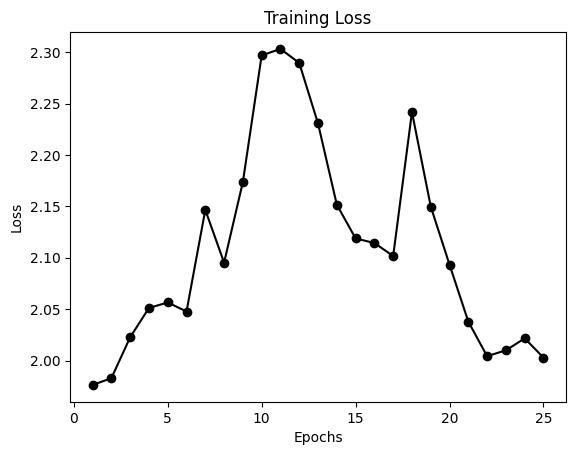

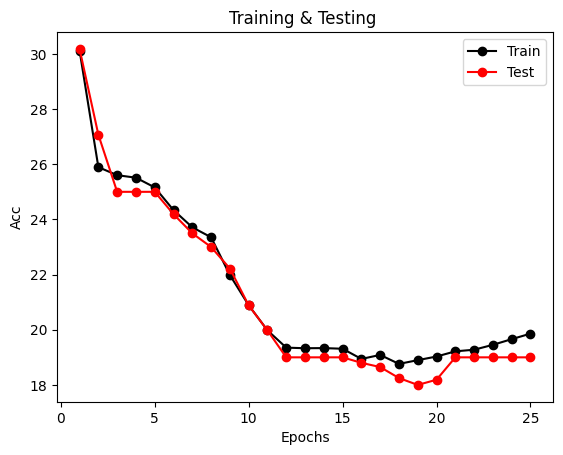

In [6]:
loss_y = {}
for y,x in epochQ2_list:
    if x not in loss_y:
        loss_y[x]=[y]
    else:
        loss_y[x].append(y)
for x in loss_y:
    loss_y[x]=np.mean(loss_y[x])
loss_y.keys(), loss_y.values()

plt.plot(loss_y.keys(),loss_y.values(), '-o', color = 'black')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


loss_y_train = {}
for y,x in CAQ2_list:
    if x not in loss_y_train:
        loss_y_train[x]=[y]
    else:
        loss_y_train[x].append(y)
for x in loss_y_train:
    loss_y_train[x]=np.mean(loss_y_train[x])


loss_y_test = {}
for y,x in TestQ2_list:
    if x not in loss_y_test:
        loss_y_test[x]=[y]
    else:
        loss_y_test[x].append(y)
for x in loss_y_test:
    loss_y_test[x]=np.mean(loss_y_test[x])


plt.plot(loss_y_train.keys(), loss_y_train.values(), '-o', color = 'black', label = 'Train')
plt.plot(loss_y_test.keys(), loss_y_test.values(), '-o', color = 'red', label = 'Test')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.title('Training & Testing ')
plt.legend()
plt.show()


## lr = 0.0001

In [7]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 140)
        self.fc2 = nn.Linear(140, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.9)

TestQ2_list = []
epochQ2_list = []
CAQ2_list = []
correct = 0
total = 0
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

for epoch in range(25):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            epochQ2_list.append((running_loss / 2000, epoch + 1))
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

    # Testing after each epoch

    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            TestQ2_list.append((100 * correct // total, epoch + 1))

    print(f'Epoch {epoch+1} - Accuracy of the network on the 10000 test images: {100 * correct // total} %')

    # prepare to count predictions for each class


    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predictions = torch.max(outputs, 1)
            # collect the correct predictions for each class
            for label, prediction in zip(labels, predictions):
                if label == prediction:
                    correct_pred[classes[label]] += 1
                total_pred[classes[label]] += 1

    # print accuracy for each class
    for classname, correct_count in correct_pred.items():
        CAQ2_list.append((100 * float(correct_count) / total_pred[classname], epoch + 1))
        accuracy = 100 * float(correct_count) / total_pred[classname]
        print(f'Epoch {epoch+1} - Accuracy for class: {classname:5s} is {accuracy:.1f} %')

print('Finished Training')


Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 2.304
[1,  4000] loss: 2.302
[1,  6000] loss: 2.299
[1,  8000] loss: 2.294
[1, 10000] loss: 2.277
[1, 12000] loss: 2.214
Epoch 1 - Accuracy of the network on the 10000 test images: 22 %
Epoch 1 - Accuracy for class: plane is 10.9 %
Epoch 1 - Accuracy for class: car   is 14.3 %
Epoch 1 - Accuracy for class: bird  is 8.0 %
Epoch 1 - Accuracy for class: cat   is 15.2 %
Epoch 1 - Accuracy for class: deer  is 12.6 %
Epoch 1 - Accuracy for class: dog   is 7.1 %
Epoch 1 - Accuracy for class: frog  is 40.3 %
Epoch 1 - Accuracy for class: horse is 34.5 %
Epoch 1 - Accuracy for class: ship  is 22.7 %
Epoch 1 - Accuracy for class: truck is 63.7 %
[2,  2000] loss: 2.116
[2,  4000] loss: 2.083
[2,  6000] loss: 2.035
[2,  8000] loss: 1.996
[2, 10000] loss: 1.932
[2, 12000] loss: 1.895
Epoch 2 - Accuracy of the network on the 10000 test images: 27 %
Epoch 2 - Accuracy for class: plane is 33.0 %
Epoch 2 - Accu

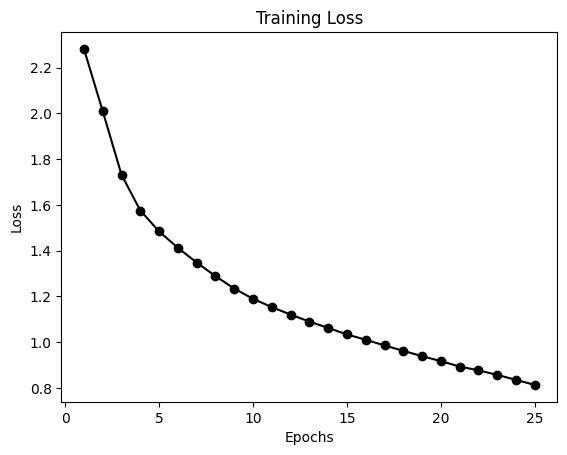

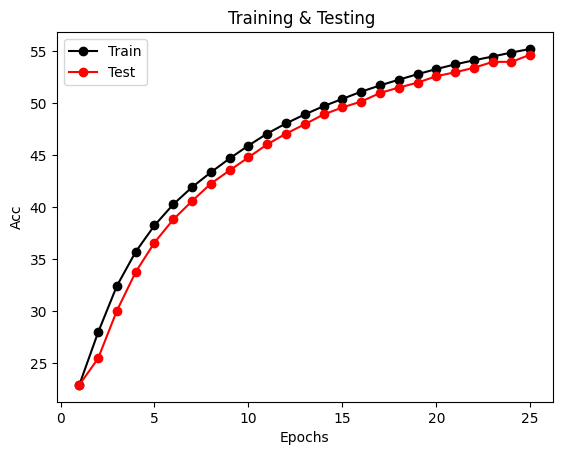

In [9]:
loss_y = {}
for y,x in epochQ2_list:
    if x not in loss_y:
        loss_y[x]=[y]
    else:
        loss_y[x].append(y)
for x in loss_y:
    loss_y[x]=np.mean(loss_y[x])
loss_y.keys(), loss_y.values()

plt.plot(loss_y.keys(),loss_y.values(), '-o', color = 'black')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


loss_y_train = {}
for y,x in CAQ2_list:
    if x not in loss_y_train:
        loss_y_train[x]=[y]
    else:
        loss_y_train[x].append(y)
for x in loss_y_train:
    loss_y_train[x]=np.mean(loss_y_train[x])


loss_y_test = {}
for y,x in TestQ2_list:
    if x not in loss_y_test:
        loss_y_test[x]=[y]
    else:
        loss_y_test[x].append(y)
for x in loss_y_test:
    loss_y_test[x]=np.mean(loss_y_test[x])


plt.plot(loss_y_train.keys(), loss_y_train.values(), '-o', color = 'black', label = 'Train')
plt.plot(loss_y_test.keys(), loss_y_test.values(), '-o', color = 'red', label = 'Test')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.title('Training & Testing ')
plt.legend()
plt.show()


# Q7

In [2]:
transform = transforms.Compose(
    [transforms.RandomResizedCrop(32),
     transforms.RandomHorizontalFlip(),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 140)
        self.fc2 = nn.Linear(140, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

TestQ2_list = []
epochQ2_list = []
CAQ2_list = []
correct = 0
total = 0
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

for epoch in range(25):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            epochQ2_list.append((running_loss / 2000, epoch + 1))
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

    # Testing after each epoch

    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            TestQ2_list.append((100 * correct // total, epoch + 1))

    print(f'Epoch {epoch+1} - Accuracy of the network on the 10000 test images: {100 * correct // total} %')

    # prepare to count predictions for each class


    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predictions = torch.max(outputs, 1)
            # collect the correct predictions for each class
            for label, prediction in zip(labels, predictions):
                if label == prediction:
                    correct_pred[classes[label]] += 1
                total_pred[classes[label]] += 1

    # print accuracy for each class
    for classname, correct_count in correct_pred.items():
        CAQ2_list.append((100 * float(correct_count) / total_pred[classname], epoch + 1))
        accuracy = 100 * float(correct_count) / total_pred[classname]
        print(f'Epoch {epoch+1} - Accuracy for class: {classname:5s} is {accuracy:.1f} %')

print('Finished Training')


Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 2.251
[1,  4000] loss: 2.088
[1,  6000] loss: 1.949
[1,  8000] loss: 1.895
[1, 10000] loss: 1.853
[1, 12000] loss: 1.821
Epoch 1 - Accuracy of the network on the 10000 test images: 33 %
Epoch 1 - Accuracy for class: plane is 33.2 %
Epoch 1 - Accuracy for class: car   is 19.7 %
Epoch 1 - Accuracy for class: bird  is 5.6 %
Epoch 1 - Accuracy for class: cat   is 3.9 %
Epoch 1 - Accuracy for class: deer  is 35.2 %
Epoch 1 - Accuracy for class: dog   is 26.0 %
Epoch 1 - Accuracy for class: frog  is 60.8 %
Epoch 1 - Accuracy for class: horse is 40.4 %
Epoch 1 - Accuracy for class: ship  is 54.3 %
Epoch 1 - Accuracy for class: truck is 55.7 %
[2,  2000] loss: 1.788
[2,  4000] loss: 1.790
[2,  6000] loss: 1.756
[2,  8000] loss: 1.750
[2, 10000] loss: 1.739
[2, 12000] loss: 1.730
Epoch 2 - Accuracy of the network on the 10000 test images: 35 %
Epoch 2 - Accuracy for class: plane is 38.3 %
Epoch 2 - Accu

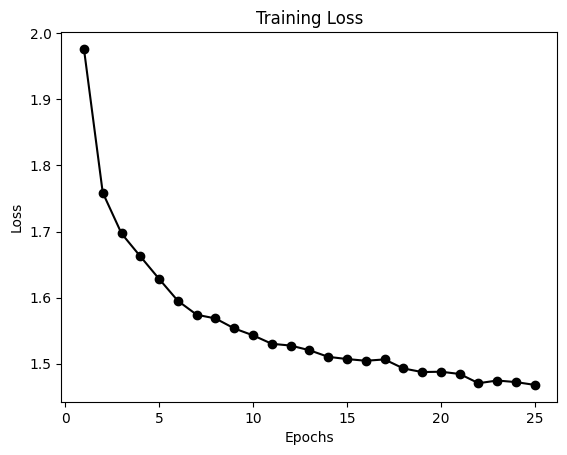

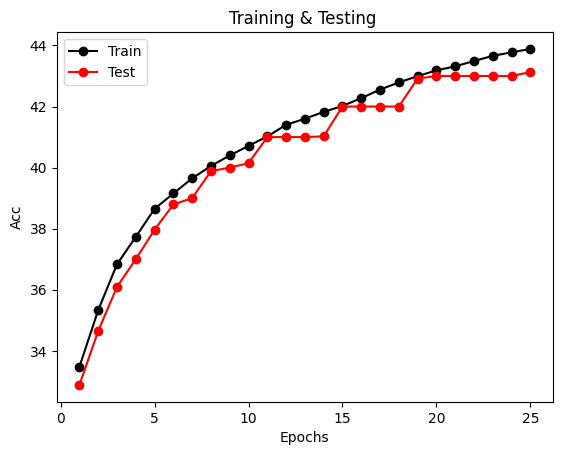

In [4]:
loss_y = {}
for y,x in epochQ2_list:
    if x not in loss_y:
        loss_y[x]=[y]
    else:
        loss_y[x].append(y)
for x in loss_y:
    loss_y[x]=np.mean(loss_y[x])
loss_y.keys(), loss_y.values()

plt.plot(loss_y.keys(),loss_y.values(), '-o', color = 'black')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


loss_y_train = {}
for y,x in CAQ2_list:
    if x not in loss_y_train:
        loss_y_train[x]=[y]
    else:
        loss_y_train[x].append(y)
for x in loss_y_train:
    loss_y_train[x]=np.mean(loss_y_train[x])


loss_y_test = {}
for y,x in TestQ2_list:
    if x not in loss_y_test:
        loss_y_test[x]=[y]
    else:
        loss_y_test[x].append(y)
for x in loss_y_test:
    loss_y_test[x]=np.mean(loss_y_test[x])


plt.plot(loss_y_train.keys(), loss_y_train.values(), '-o', color = 'black', label = 'Train')
plt.plot(loss_y_test.keys(), loss_y_test.values(), '-o', color = 'red', label = 'Test')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.title('Training & Testing ')
plt.legend()
plt.show()


## Q8

In [5]:
# Same setup as before

def apply_augmentation(images):
    # Add your augmentation code here. For example:
    images = transforms.functional.hflip(images)
    return images

transform = transforms.Compose([
    transforms.RandomResizedCrop(32),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 140)
        self.fc2 = nn.Linear(140, 84)
        self.fc3 = nn.Linear(84, 10)
        self.dropout = nn.Dropout(0.5)  # Add dropout layer

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout
        x = F.relu(self.fc2(x))
        x = self.dropout(x)  # Apply dropout
        x = self.fc3(x)
        return x

net = Net()
net.train()

num_augmentations = 10
correct = 0
total = 0

epochQ8_list = []

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(50):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            epochQ8_list.append(running_loss)
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

    lossList = np.array([])
    lossList = np.append(lossList, running_loss/ 2000)

TestQ8_list = []
with torch.no_grad():
    for data in testloader:
        images, labels = data

        # Perform test time augmentation and prediction
        predictions_list = []
        for _ in range(num_augmentations):
            augmented_images = apply_augmentation(images)
            outputs = net(augmented_images)
            _, predicted = torch.max(outputs.data, 1)
            predictions_list.append(predicted)
        
        # Average the predictions
        predictions_avg = torch.stack(predictions_list).mode(dim=0)[0]

        total += labels.size(0)
        correct += (predictions_avg == labels).sum().item()
        TestQ8_list.append(100 * correct // total)

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in testloader:
        images, labels = data
        predictions_list = []
        for _ in range(num_augmentations):
            augmented_images = apply_augmentation(images)
            outputs = net(augmented_images)
            _, predicted = torch.max(outputs, 1)
            predictions_list.append(predicted)

        predictions_avg = torch.stack(predictions_list).mode(dim=0)[0]

        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions_avg):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

# print accuracy for each class
CAQ8_list = []
for classname, correct_count in correct_pred.items():
    CAQ8_list.append(100 * float(correct_count) / total_pred[classname])
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class {classname} is {accuracy} %')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Test time


Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 2.286
[1,  4000] loss: 2.148
[1,  6000] loss: 2.083
[1,  8000] loss: 2.027
[1, 10000] loss: 2.004
[1, 12000] loss: 1.970
[2,  2000] loss: 1.942
[2,  4000] loss: 1.915
[2,  6000] loss: 1.887
[2,  8000] loss: 1.879
[2, 10000] loss: 1.864
[2, 12000] loss: 1.867
[3,  2000] loss: 1.847
[3,  4000] loss: 1.832
[3,  6000] loss: 1.826
[3,  8000] loss: 1.821
[3, 10000] loss: 1.834
[3, 12000] loss: 1.815
[4,  2000] loss: 1.811
[4,  4000] loss: 1.801
[4,  6000] loss: 1.807
[4,  8000] loss: 1.802
[4, 10000] loss: 1.799
[4, 12000] loss: 1.794
[5,  2000] loss: 1.796
[5,  4000] loss: 1.781
[5,  6000] loss: 1.776
[5,  8000] loss: 1.781
[5, 10000] loss: 1.771
[5, 12000] loss: 1.756
[6,  2000] loss: 1.751
[6,  4000] loss: 1.773
[6,  6000] loss: 1.770
[6,  8000] loss: 1.779
[6, 10000] loss: 1.769
[6, 12000] loss: 1.750
[7,  2000] loss: 1.760
[7,  4000] loss: 1.758
[7,  6000] loss: 1.755
[7,  8000] loss: 1.761
[7, 

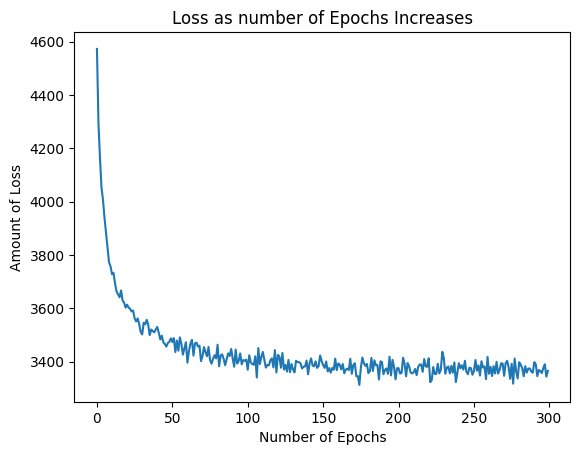

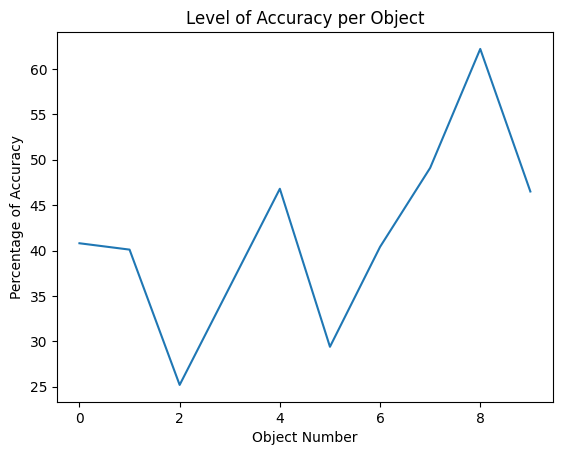

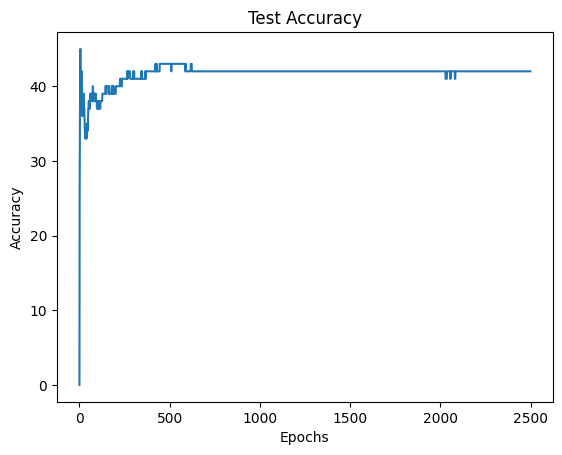

In [6]:
loss_lst4 = epochQ8_list
plt.plot(loss_lst4)
plt.xlabel('Number of Epochs')
plt.ylabel('Amount of Loss')
plt.title('Loss as number of Epochs Increases')
plt.show()

##Plot for Class Accuracy
class_accuracy4 = CAQ8_list
plt.plot(class_accuracy4)
plt.xlabel("Object Number")
plt.ylabel("Percentage of Accuracy")
plt.title("Level of Accuracy per Object")
plt.show()


plt.plot(TestQ8_list)
plt.xlabel("Epochs")      
plt.ylabel("Accuracy")    
plt.title("Test Accuracy")
plt.show()